# Distributed Training of Neural Network Models


Below is the basic implementation of Federated Learning code for 2 clients and a server for one communication round using the MNIST dataset.

Your task for this lab is to utilize this code as a benchmark and accomplish  the following objectives:

1. Comment each section of the code to understand its functionality.

2. Experiment with different neural network architectures, varying the number of layers and activation functions

3. Assess the model's performance as the number of clients changes. Utilize 2, 4, 6, 8, and 10 clients, and plot a graph illustrating the model's performance across varying client counts.

4. Introduce one dishonest client. For this client, assign some training labels ('y_train') to a specific label, such as '4'. Analyze how the performance ((accuracy, precision, recall, and f-score)) of the global model is affected by the presence of a dishonest client. Find approximately how many labels need to be maliciously altered so that the performance degrades.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import backend as K
import random


In [ ]:

np.random.seed(2295528)

random.seed(2295528)

tf.random.set_seed(2295528)
K.clear_session()

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
# Define client functions
def create_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_client_model(model, x_train, y_train, epochs=5):
    model.fit(x_train, y_train, epochs=epochs,
              #verbose=0,
             verbose=1)
    return model

## 2 Clients

In [ ]:
# Split data into two clients
x_train_c1, x_train_c2, y_train_c1, y_train_c2 = train_test_split(x_train, y_train, test_size=0.5,random_state= 42)

In [ ]:
# Create and train client models

client1_model = create_client_model()
client2_model = create_client_model()

client1_model = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model = train_client_model(client2_model, x_train_c2, y_train_c2)

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.3422 - accuracy: 0.9039
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1599 - accuracy: 0.9532
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1123 - accuracy: 0.9677
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0834 - accuracy: 0.9748
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0630 - accuracy: 0.9823
Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3451 - accuracy: 0.9020
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.1639 - accuracy: 0.9530
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1149 - accuracy: 0.9662
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0837 - accuracy: 0.9752
Epoch 5/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0638 - accuracy: 0.9813


In [ ]:
# Federated averaging

def federated_average_weights(weights1, weights2):
    new_weights = []
    for w1, w2 in zip(weights1, weights2):
        new_weights.append((w1 + w2) / 2)
    return new_weights

In [ ]:
# Aggregate models

aggregated_weights = federated_average_weights(client1_model.get_weights(), client2_model.get_weights())

In [ ]:
# Create global model and set weights

global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [ ]:
# Evaluate global model

test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3408 - accuracy: 0.9221 - 1s/epoch - 3ms/step
Test accuracy: 0.9221000075340271


In [ ]:
test_accuracy = []

In [ ]:
test_accuracy.append(test_acc)

In [ ]:
test_accuracy

[0.8851000070571899]

#### Write your code to calculate precision, recall, and F-score


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

313/313 [==============================] - 1s 1ms/step
(10000, 10)


In [ ]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall:", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score:", f1_score(y_test, predictions, average = 'weighted' ))

Accuracy: 0.9221
Precision: 0.9289812986640041
Recall: 0.9221
F-score: 0.9230142174911427


In [ ]:
test_precision = []
test_recall    = []
test_f1_score  = []

In [ ]:
test_precision.append(precision_score(y_test, predictions, average = 'weighted' ))
test_recall.append(recall_score(y_test, predictions, average = 'weighted' ))
test_f1_score.append(f1_score(y_test, predictions, average = 'weighted' ))

#### Display confusion matrix between actual and predicted values on the test data.


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

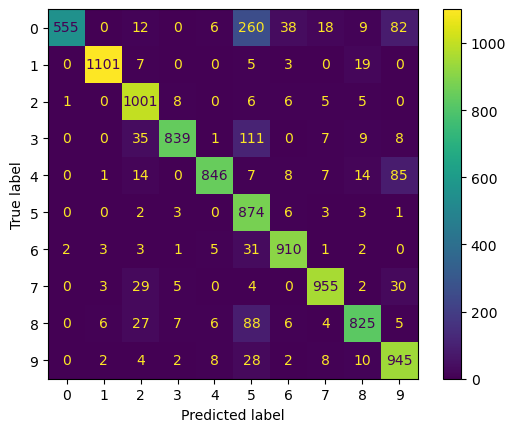

In [ ]:
# display confusion matrix between test output and predicted output

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot();
#plt.show()

## Lab Logbook requirement: Document the

1. Plot the model's performance for the number of clients ranging from 2, 4, 6, 8, and 10.

2. For any specified number of clients, compare the model's performance when one (or more) dishonest clients are present. Plot the performance metrics before and after the presence of dishonest clients.

## Plot the model's performance for the number of clients ranging from 2, 4, 6, 8, and 10.

## 4 Clients

In [ ]:
# Split data into 4 clients

In [ ]:
Client_1 = (x_train[0:15000], y_train[0:15000])
Client_2 = (x_train[15000:30000], y_train[15000:30000])
Client_3 = (x_train[30000:45000], y_train[30000:45000])
Client_4 = (x_train[45000:], y_train[45000:])

In [ ]:
print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)

(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000,)
(15000,)
(15000,)
(15000,)


In [ ]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4505 - accuracy: 0.8746
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2155 - accuracy: 0.9385
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1517 - accuracy: 0.9576
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1130 - accuracy: 0.9694
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0851 - accuracy: 0.9779
Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 2.3142 - accuracy: 0.1023
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 2.2962 - accuracy: 0.1215
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 2.2872 - accuracy: 0.1291
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 2.2728 - accuracy: 0.1433
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 2.2533 - accuracy: 0.1586
Epoch 1/5


In [ ]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4):
    new_weights = []
    for w1, w2, w3, w4 in zip(weights1, weights2, weights3, weights4):
        new_weights.append((w1 + w2 + w3 + w4) / 4)
    return new_weights


In [ ]:
# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [ ]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 2.2287 - accuracy: 0.3341 - 616ms/epoch - 2ms/step
Test accuracy: 0.33410000801086426


In [ ]:
predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

313/313 [==============================] - 1s 1ms/step
(10000, 10)


In [ ]:
print("Accuracy: ", accuracy_score(y_test, predictions))

print("Precision: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score: ", f1_score(y_test, predictions, average = 'weighted' ))


Accuracy:  0.3341
Precision:  0.4360733283466976
Recall:  0.3341
F-score:  0.3081245359277425


In [ ]:
test_accuracy.append(accuracy_score(y_test, predictions))
test_precision.append(precision_score(y_test, predictions, average = 'weighted' ))
test_recall.append(recall_score(y_test, predictions, average = 'weighted' ))
test_f1_score.append(f1_score(y_test, predictions, average = 'weighted' ))

In [ ]:
print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.9221000075340271, 0.3341]
[0.9289812986640041, 0.4360733283466976]
[0.9221, 0.3341]
[0.9230142174911427, 0.3081245359277425]


## 6 Clients

In [ ]:
Client_1 = (x_train[0:10000], y_train[0:10000])
Client_2 = (x_train[10000:20000], y_train[10000:20000])
Client_3 = (x_train[20000:30000], y_train[20000:30000])
Client_4 = (x_train[30000:40000], y_train[30000:40000])
Client_5 = (x_train[40000:50000], y_train[40000:50000])
Client_6 = (x_train[50000:], y_train[50000:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


In [ ]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])

Epoch 1/5
313/313 [==============================] - 2s 6ms/step - loss: 0.5133 - accuracy: 0.8582
Epoch 2/5
313/313 [==============================] - 2s 6ms/step - loss: 0.2367 - accuracy: 0.9332
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1744 - accuracy: 0.9506
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1360 - accuracy: 0.9611
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1065 - accuracy: 0.9705
Epoch 1/5
313/313 [==============================] - 2s 5ms/step - loss: 2.3271 - accuracy: 0.1040
Epoch 2/5
313/313 [==============================] - 2s 6ms/step - loss: 2.2934 - accuracy: 0.1217
Epoch 3/5
313/313 [==============================] - 1s 5ms/step - loss: 2.2791 - accuracy: 0.1416
Epoch 4/5
313/313 [==============================] - 2s 5ms/step - loss: 2.2569 - accuracy: 0.1543
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 2.2316 - accuracy: 0.1727
Epoch 1/5


In [ ]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5, weights6):
    new_weights = []
    for w1, w2, w3, w4, w5, w6 in zip(weights1, weights2, weights3, weights4, weights5, weights6):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6) / 6)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [ ]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy: ", accuracy_score(y_test, predictions))

print("Precision: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - loss: 2.0149 - accuracy: 0.5785 - 1s/epoch - 4ms/step
Test accuracy: 0.578499972820282
313/313 [==============================] - 1s 3ms/step
(10000, 10)
Accuracy test set:  0.5785
Precision test set:  0.711910426069019
Recall test set:  0.5785
F-score test set:  0.5256294581541289
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       980
           1       0.98      0.04      0.09      1135
           2       0.58      0.75      0.65      1032
           3       0.47      0.93      0.62      1010
           4       0.91      0.49      0.64       982
           5       0.47      0.80      0.59       892
           6       0.81      0.60      0.69       958
           7       0.41      0.83      0.55      1028
           8       0.88      0.02      0.03       974
           9       0.77      0.52      0.62      1009

    accuracy                           0.58     10000
   macro avg       0.71      0.59      0.53     1000

In [ ]:
test_accuracy.append(accuracy_score(y_test, predictions))
test_precision.append(precision_score(y_test, predictions, average = 'weighted' ))
test_recall.append(recall_score(y_test, predictions, average = 'weighted' ))
test_f1_score.append(f1_score(y_test, predictions, average = 'weighted' ))

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.9221000075340271, 0.3341, 0.5785]
[0.9289812986640041, 0.4360733283466976, 0.711910426069019]
[0.9221, 0.3341, 0.5785]
[0.9230142174911427, 0.3081245359277425, 0.5256294581541289]


## 8 Clients

In [ ]:
Client_1 = (x_train[0:7500], y_train[0:7500])
Client_2 = (x_train[7500:15000], y_train[7500:15000])
Client_3 = (x_train[15000:22500], y_train[15000:22500])
Client_4 = (x_train[22500:30000], y_train[22500:30000])
Client_5 = (x_train[30000:37500], y_train[30000:37500])
Client_6 = (x_train[37500:45000], y_train[37500:45000])
Client_7 = (x_train[45000:52500], y_train[45000:52500])
Client_8 = (x_train[52500:], y_train[52500:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)
print(Client_7[0].shape)
print(Client_8[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)
print(Client_7[1].shape)
print(Client_8[1].shape)

# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()
client7_model = create_client_model()
client8_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])
client7_model = train_client_model(client7_model, Client_7[0], Client_7[1])
client8_model = train_client_model(client8_model, Client_8[0], Client_8[1])

(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
Epoch 1/5
235/235 [==============================] - 1s 3ms/step - loss: 0.5888 - accuracy: 0.8384
Epoch 2/5
235/235 [==============================] - 1s 3ms/step - loss: 0.2536 - accuracy: 0.9297
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.1917 - accuracy: 0.9461
Epoch 4/5
235/235 [==============================] - 1s 2ms/step - loss: 0.1478 - accuracy: 0.9596
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9684
Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 2.3234 - accuracy: 0.1011
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 2.2898 - accuracy: 0.1304
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 2.2715 - accuracy: 0.1464


In [ ]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4,
                              weights5, weights6, weights7, weights8):
    new_weights = []
    for w1, w2, w3, w4, w5, w6, w7, w8 in zip(weights1, weights2, weights3, weights4,
                                              weights5, weights6, weights7, weights8):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6 + w7 +w8) / 8)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights(),
                                               client7_model.get_weights(),
                                               client8_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [ ]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy: ", accuracy_score(y_test, predictions))

print("Precision: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - loss: 1.8254 - accuracy: 0.7167 - 1s/epoch - 4ms/step
Test accuracy: 0.71670001745224
313/313 [==============================] - 2s 5ms/step
(10000, 10)
Accuracy:  0.7167
Precision:  0.799723508805243
Recall:  0.7167
F-score:  0.6993775132653993
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       980
           1       0.97      0.56      0.71      1135
           2       0.49      0.95      0.64      1032
           3       0.78      0.78      0.78      1010
           4       0.94      0.84      0.89       982
           5       0.62      0.73      0.67       892
           6       0.93      0.90      0.91       958
           7       0.52      0.93      0.67      1028
           8       0.95      0.15      0.26       974
           9       0.89      0.39      0.54      1009

    accuracy                           0.72     10000
   macro avg       0.80      0.72      0.70     10000
weighted avg       0.80      0.72  

In [ ]:
test_accuracy.append(accuracy_score(y_test, predictions))
test_precision.append(precision_score(y_test, predictions, average = 'weighted' ))
test_recall.append(recall_score(y_test, predictions, average = 'weighted' ))
test_f1_score.append(f1_score(y_test, predictions, average = 'weighted' ))

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.9221000075340271, 0.3341, 0.5785, 0.7167]
[0.9289812986640041, 0.4360733283466976, 0.711910426069019, 0.799723508805243]
[0.9221, 0.3341, 0.5785, 0.7167]
[0.9230142174911427, 0.3081245359277425, 0.5256294581541289, 0.6993775132653993]


## 10 Clients

In [ ]:
Client_1 = (x_train[0:6000], y_train[0:6000])
Client_2 = (x_train[6000:12000], y_train[6000:12000])
Client_3 = (x_train[12000:18000], y_train[12000:18000])
Client_4 = (x_train[18000:24000], y_train[18000:24000])
Client_5 = (x_train[24000:30000], y_train[24000:30000])
Client_6 = (x_train[30000:36000], y_train[30000:36000])
Client_7 = (x_train[36000:42000], y_train[36000:42000])
Client_8 = (x_train[42000:48000], y_train[42000:48000])
Client_9 = (x_train[48000:54000], y_train[48000:54000])
Client_10 = (x_train[54000:], y_train[54000:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)
print(Client_7[0].shape)
print(Client_8[0].shape)
print(Client_9[0].shape)
print(Client_10[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)
print(Client_7[1].shape)
print(Client_8[1].shape)
print(Client_9[1].shape)
print(Client_10[1].shape)

# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()
client7_model = create_client_model()
client8_model = create_client_model()
client9_model = create_client_model()
client10_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])
client7_model = train_client_model(client7_model, Client_7[0], Client_7[1])
client8_model = train_client_model(client8_model, Client_8[0], Client_8[1])
client9_model = train_client_model(client9_model, Client_9[0], Client_9[1])
client10_model = train_client_model(client10_model, Client_10[0], Client_10[1])

(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
Epoch 1/5
188/188 [==============================] - 1s 3ms/step - loss: 0.6346 - accuracy: 0.8302
Epoch 2/5
188/188 [==============================] - 0s 3ms/step - loss: 0.2666 - accuracy: 0.9313
Epoch 3/5
188/188 [==============================] - 0s 3ms/step - loss: 0.1952 - accuracy: 0.9463
Epoch 4/5
188/188 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.9588
Epoch 5/5
188/188 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.9702
Epoch 1/5
188/188 [==============================] - 1s 3ms/step - loss: 2.3324 - accuracy: 0.1005
Epoch 2/5
188/188 [==============================] - 0s 3ms/step - loss: 2.2843 - accuracy: 0.1295
Epoch 3/5
188/188 [============================

In [ ]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5,
                              weights6, weights7, weights8, weights9, weights10):
    new_weights = []
    for w1, w2, w3, w4, w5, w6, w7, w8, w9, w10 in zip(weights1, weights2, weights3, weights4,
                                                      weights5, weights6, weights7, weights8,
                                                      weights9, weights10):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6 + w7 + w8 + w9 + w10) / 10)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights(),
                                               client7_model.get_weights(),
                                               client8_model.get_weights(),
                                               client9_model.get_weights(),
                                               client10_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [ ]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy: ", accuracy_score(y_test, predictions))

print("Precision: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - loss: 1.8184 - accuracy: 0.6159 - 1s/epoch - 4ms/step
Test accuracy: 0.6158999800682068
313/313 [==============================] - 1s 3ms/step
(10000, 10)
Accuracy test set:  0.6159
Precision test set:  0.8005211115987022
Recall test set:  0.6159
F-score test set:  0.5922427202125892
              precision    recall  f1-score   support

           0       0.99      0.36      0.53       980
           1       0.98      0.84      0.90      1135
           2       0.61      0.92      0.73      1032
           3       0.96      0.58      0.72      1010
           4       0.93      0.78      0.85       982
           5       0.40      0.80      0.54       892
           6       0.97      0.72      0.83       958
           7       0.33      0.97      0.49      1028
           8       0.97      0.10      0.18       974
           9       0.84      0.06      0.11      1009

    accuracy                           0.62     10000
   macro avg       0.80      0.61      0.59     10

In [ ]:
test_accuracy.append(accuracy_score(y_test, predictions))
test_precision.append(precision_score(y_test, predictions, average = 'weighted' ))
test_recall.append(recall_score(y_test, predictions, average = 'weighted' ))
test_f1_score.append(f1_score(y_test, predictions, average = 'weighted' ))

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.9221000075340271, 0.3341, 0.5785, 0.7167, 0.6159]
[0.9289812986640041, 0.4360733283466976, 0.711910426069019, 0.799723508805243, 0.8005211115987022]
[0.9221, 0.3341, 0.5785, 0.7167, 0.6159]
[0.9230142174911427, 0.3081245359277425, 0.5256294581541289, 0.6993775132653993, 0.5922427202125892]


### Plot the model's performance for the number of clients ranging from 2, 4, 6, 8, and 10.

In [ ]:
import pandas as pd

In [ ]:
ErrorMetrics = []
ErrorMetrics.append(test_accuracy)
ErrorMetrics.append(test_precision)
ErrorMetrics.append(test_recall)
ErrorMetrics.append(test_f1_score)

print(ErrorMetrics)

ErrorMetrics_pd = pd.DataFrame(ErrorMetrics)
ErrorMetrics_pd.columns = [2,4,6,8,10]
ErrorMetrics_pd = ErrorMetrics_pd.T
ErrorMetrics_pd.columns = ['Accuracy','Precision','Recall','F1_Score']
ErrorMetrics_pd

[[0.9221000075340271, 0.3341, 0.5785, 0.7167, 0.6159], [0.9289812986640041, 0.4360733283466976, 0.711910426069019, 0.799723508805243, 0.8005211115987022], [0.9221, 0.3341, 0.5785, 0.7167, 0.6159], [0.9230142174911427, 0.3081245359277425, 0.5256294581541289, 0.6993775132653993, 0.5922427202125892]]


,Accuracy,Precision,Recall,F1_Score
2,0.9221,0.928981,0.9221,0.923014
4,0.3341,0.436073,0.3341,0.308125
6,0.5785,0.711910,0.5785,0.525629
8,0.7167,0.799724,0.7167,0.699378
10,0.6159,0.800521,0.6159,0.592243


<Axes: >

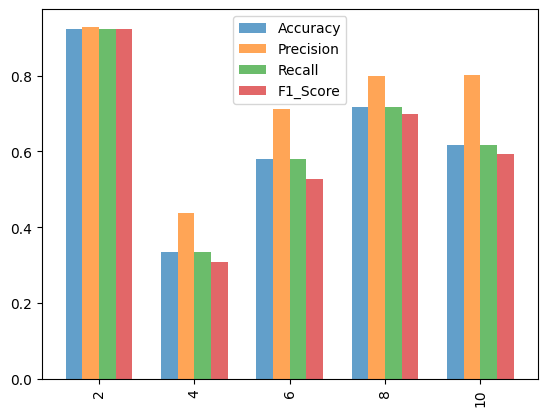

In [ ]:
ErrorMetrics_pd.plot.bar(width=0.7, alpha=0.7)

### 2.For any specified number of clients, compare the model's performance when one (or more) dishonest clients are present. Plot the performance metrics before and after the presence of dishonest clients.

#### Take 6 Clients, one of them is assumed dishonest



In [ ]:
# Split data into 6 clients

In [ ]:
Client_1 = (x_train[0:10000], y_train[0:10000])
Client_2 = (x_train[10000:20000], y_train[10000:20000])
Client_3 = (x_train[20000:30000], y_train[20000:30000])
Client_4 = (x_train[30000:40000], y_train[30000:40000])
Client_5 = (x_train[40000:50000], y_train[40000:50000])
Client_6 = (x_train[50000:], y_train[50000:])

In [ ]:
Client_4[1].size

10000

In [ ]:
Client_2[1]

array([3, 8, 7, ..., 1, 4, 2], dtype=uint8)

In [ ]:
### Client_2 is assumed dishonest and changing the training data. Some labels are set as 4
### Change the first 2000 labels

Client_4[1][:2000] = 3

In [ ]:
Client_4[1]

array([3, 3, 3, ..., 9, 9, 5], dtype=uint8)

In [ ]:
print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


In [ ]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])

Epoch 1/5
313/313 [==============================] - 1s 3ms/step - loss: 0.5268 - accuracy: 0.8578
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2380 - accuracy: 0.9325
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1740 - accuracy: 0.9514
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1355 - accuracy: 0.9609
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1039 - accuracy: 0.9713
Epoch 1/5
313/313 [==============================] - 1s 3ms/step - loss: 2.3189 - accuracy: 0.1045
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 2.2935 - accuracy: 0.1228
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 2.2780 - accuracy: 0.1432
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 2.2582 - accuracy: 0.1555
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 2.2310 - accuracy: 0.1772
Epoch 1/5


In [ ]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5, weights6):
    new_weights = []
    for w1, w2, w3, w4, w5, w6 in zip(weights1, weights2, weights3, weights4, weights5, weights6):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6) / 6)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(),
                                               client2_model.get_weights(),
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [ ]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy: ", accuracy_score(y_test, predictions))

print("Precision: ", precision_score(y_test, predictions, average = 'weighted' ))
print("Recall: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - loss: 2.0120 - accuracy: 0.7772 - 1s/epoch - 3ms/step
Test accuracy: 0.7771999835968018
313/313 [==============================] - 1s 2ms/step
(10000, 10)
Accuracy:  0.7772
Precision:  0.7920064781019767
Recall:  0.7772
F-score:  0.7759029175417168
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       980
           1       0.90      0.91      0.91      1135
           2       0.74      0.75      0.74      1032
           3       0.55      0.83      0.66      1010
           4       0.77      0.93      0.84       982
           5       0.74      0.79      0.76       892
           6       0.92      0.83      0.87       958
           7       0.85      0.75      0.80      1028
           8       0.79      0.48      0.60       974
           9       0.81      0.65      0.72      1009

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.77     10000
weighted avg       0.79      0.7

In [ ]:
test_accuracy_dishonest  = []
test_precision_dishonest = []
test_recall_dishonest    = []
test_f1_score_dishonest  = []

In [ ]:
test_accuracy_dishonest.append(test_accuracy[4])
test_precision_dishonest.append(test_precision[4])
test_recall_dishonest.append(test_recall[4])
test_f1_score_dishonest.append(test_f1_score[4])

test_accuracy_dishonest.append(0.7197999954223633)
test_precision_dishonest.append(0.7649681801937827)
test_recall_dishonest.append(0.7198)
test_f1_score_dishonest.append(0.7079021148713025)

print(test_accuracy_dishonest)
print(test_precision_dishonest)
print(test_recall_dishonest)
print(test_f1_score_dishonest)

[0.6159, 0.7197999954223633]
[0.8005211115987022, 0.7649681801937827]
[0.6159, 0.7198]
[0.5922427202125892, 0.7079021148713025]


In [ ]:
### Plot the model's performance for the 6 clients, one of them (number=2) is dishonest

ErrorMetrics = []
ErrorMetrics.append(test_accuracy_dishonest)
ErrorMetrics.append(test_precision_dishonest)
ErrorMetrics.append(test_recall_dishonest)
ErrorMetrics.append(test_f1_score_dishonest)

print(ErrorMetrics)

ErrorMetrics_pd = pd.DataFrame(ErrorMetrics)
ErrorMetrics_pd.columns = ['Every input is honest', 'Client 4 is honest']
ErrorMetrics_pd = ErrorMetrics_pd.T
ErrorMetrics_pd.columns = ['Accuracy','Precision','Recall','F1_Score']
ErrorMetrics_pd

[[0.6159, 0.7197999954223633], [0.8005211115987022, 0.7649681801937827], [0.6159, 0.7198], [0.5922427202125892, 0.7079021148713025]]


,Accuracy,Precision,Recall,F1_Score
Every input is honest,0.6159,0.800521,0.6159,0.592243
Client 4 is dishonest,0.7198,0.764968,0.7198,0.707902


<Axes: >

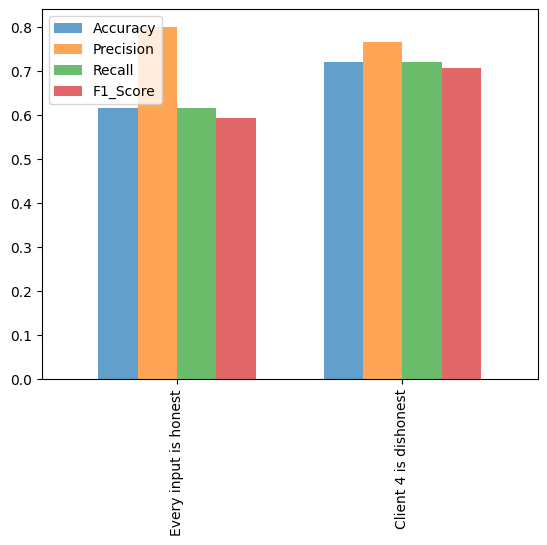

In [ ]:
ErrorMetrics_pd.plot.bar(width=0.7, alpha=0.7)